<h1>Speech Emotion Recognition

<h3>Getting the data from Kaggle : https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess

In [3]:
import os
os.environ['KAGGLE_USERNAME']='roriirorii'#the username
os.environ['KAGGLE_KEY']='ee5b5e9ed8a07bd4ff2ad36cc3f1b18b'#the key
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess

 98% 418M/428M [00:02<00:00, 224MB/s]
100% 428M/428M [00:02<00:00, 195MB/s]


<h3>Once the dataset is downloaded, it is going to be zipped, and in order to use it, you need to unzip it.

In [4]:
from zipfile import ZipFile
file_name='/content/toronto-emotional-speech-set-tess.zip'
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Dataset is Loaded')

Dataset is Loaded


<h3>Importing the Libraries

In [5]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [6]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/content/TESS Toronto emotional speech set data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [7]:
len(paths)

2800

In [8]:
paths[:5]

['/content/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_laud_ps.wav',
 '/content/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_which_ps.wav',
 '/content/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_mode_ps.wav',
 '/content/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_boat_ps.wav',
 '/content/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_dead_ps.wav']

In [9]:
len(labels)

2800

In [10]:
labels[:5]

['ps', 'ps', 'ps', 'ps', 'ps']

In [11]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/content/TESS Toronto emotional speech set dat...,ps
1,/content/TESS Toronto emotional speech set dat...,ps
2,/content/TESS Toronto emotional speech set dat...,ps
3,/content/TESS Toronto emotional speech set dat...,ps
4,/content/TESS Toronto emotional speech set dat...,ps


In [12]:
df['label'].value_counts()

ps         400
neutral    400
fear       400
happy      400
angry      400
sad        400
disgust    400
Name: label, dtype: int64

<h3>Exploratory Data Analysis

<Axes: xlabel='label', ylabel='Count'>

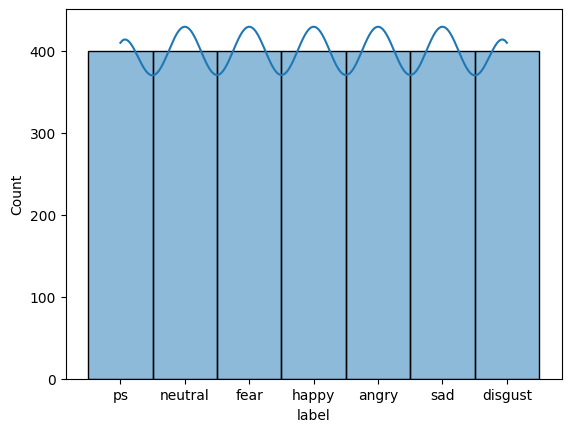

In [13]:
sns.histplot(data=df, x='label', kde=True)

<Axes: xlabel='label', ylabel='count'>

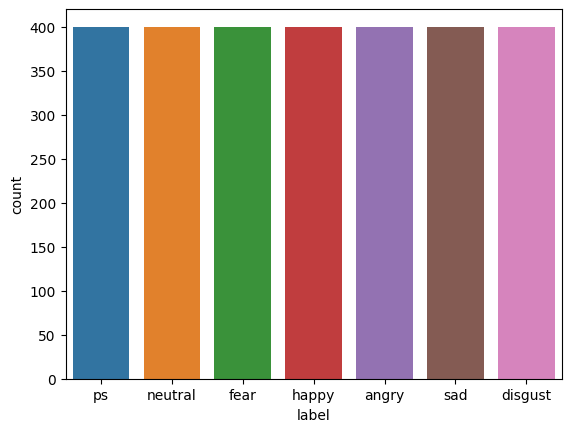

In [14]:
sns.countplot(data=df, x='label')

In [15]:
import librosa
import librosa.display
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

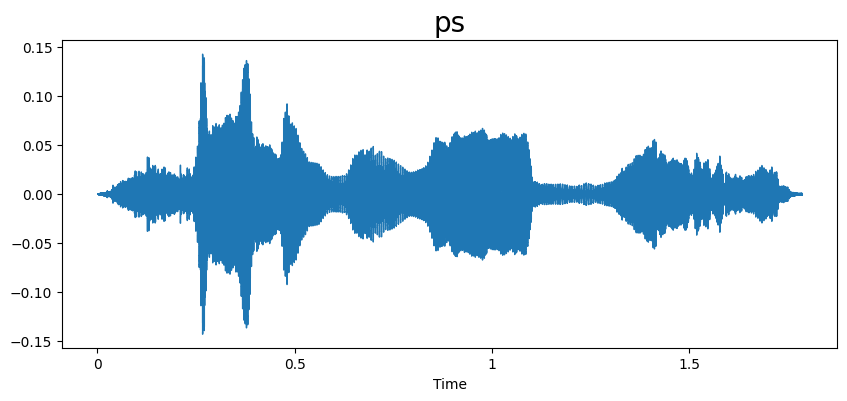

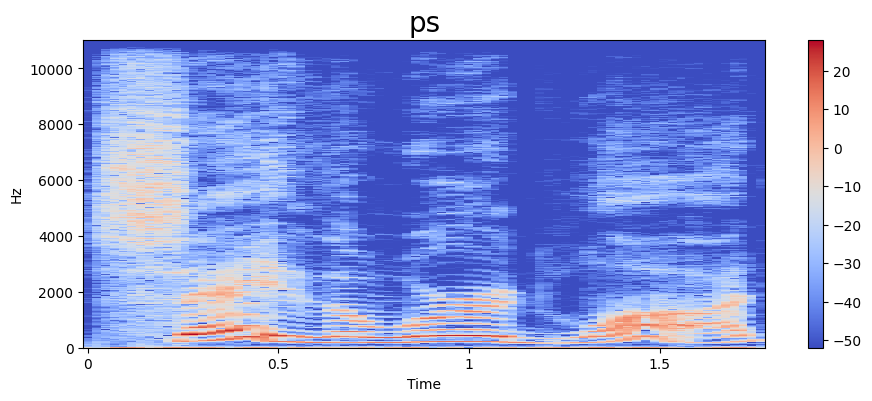

In [16]:
import librosa
import librosa.display
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)


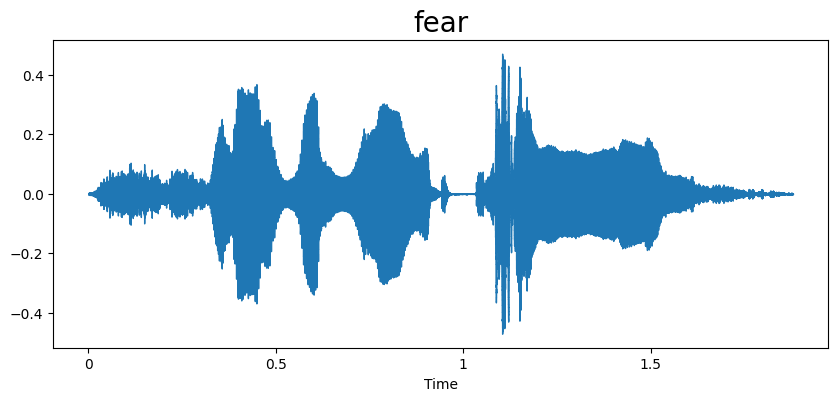

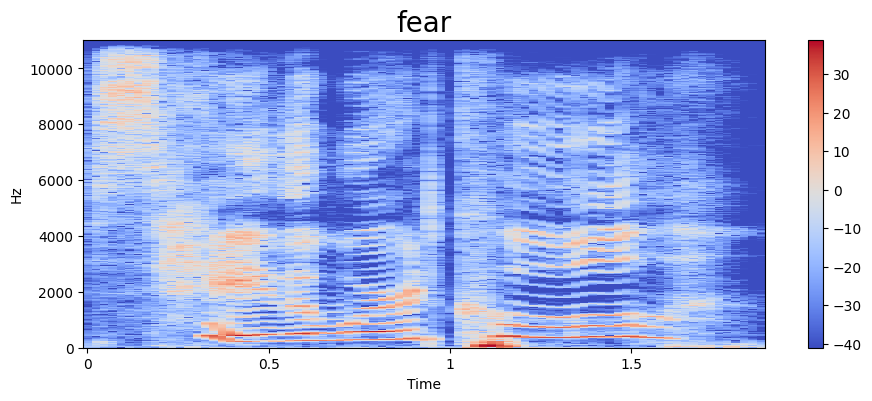

In [17]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

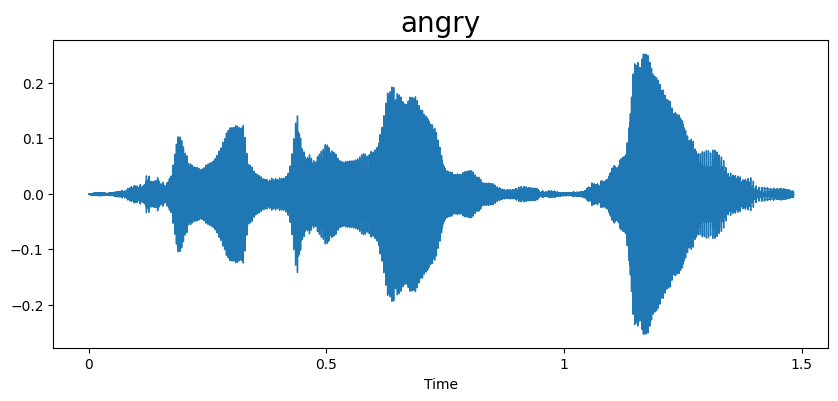

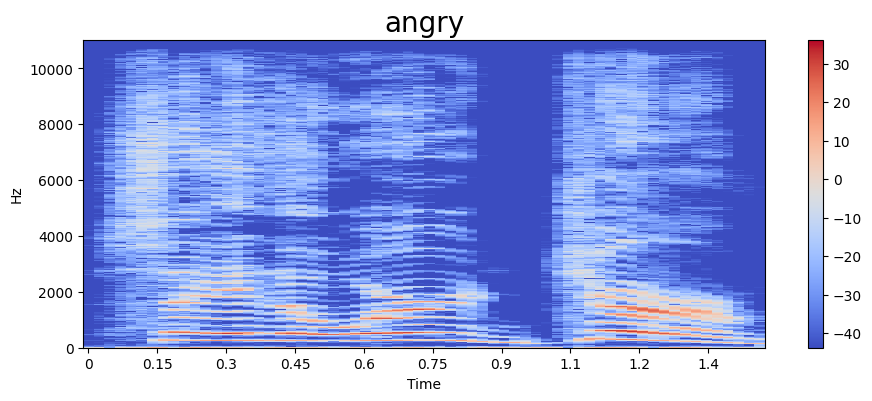

In [18]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

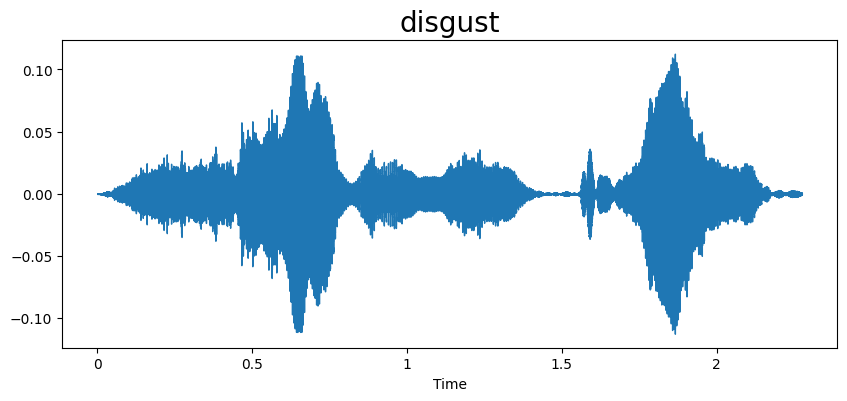

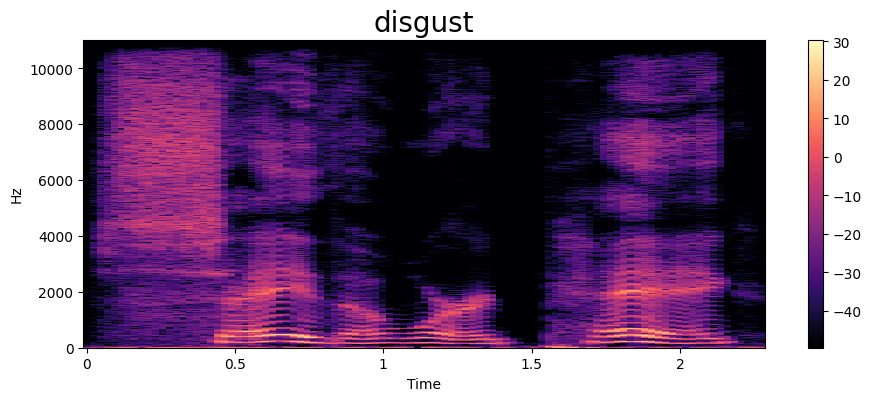

In [19]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

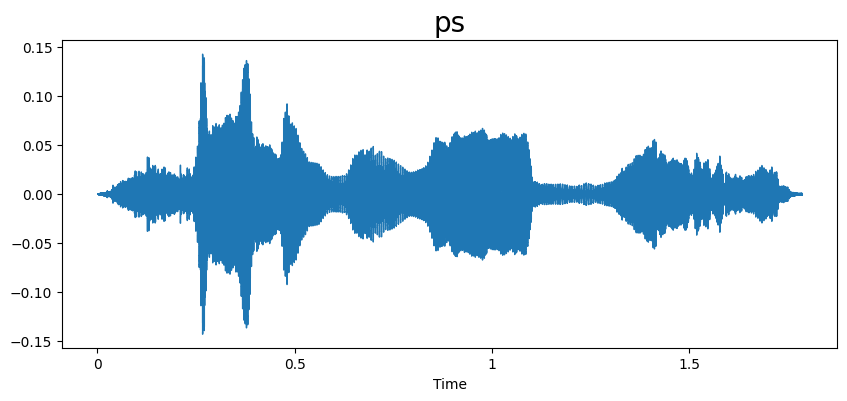

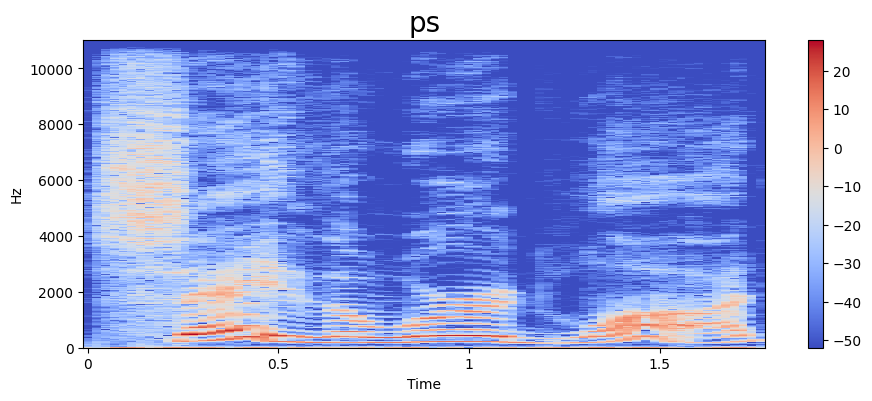

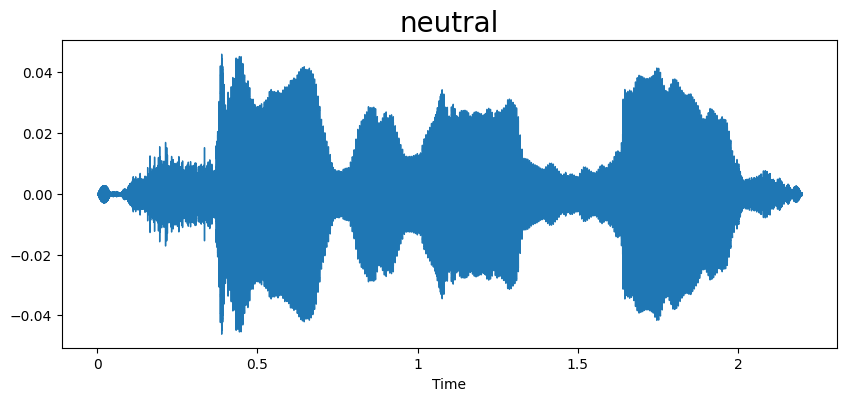

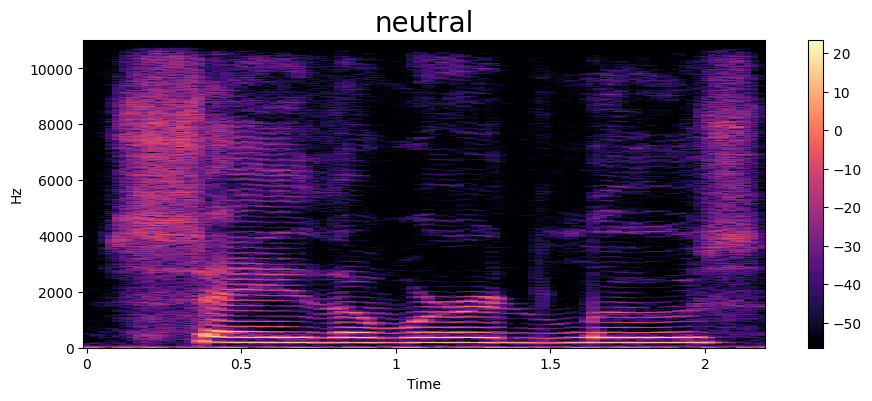

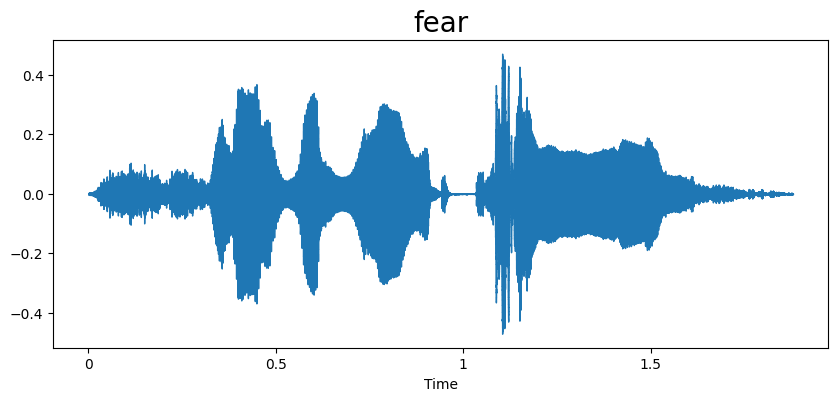

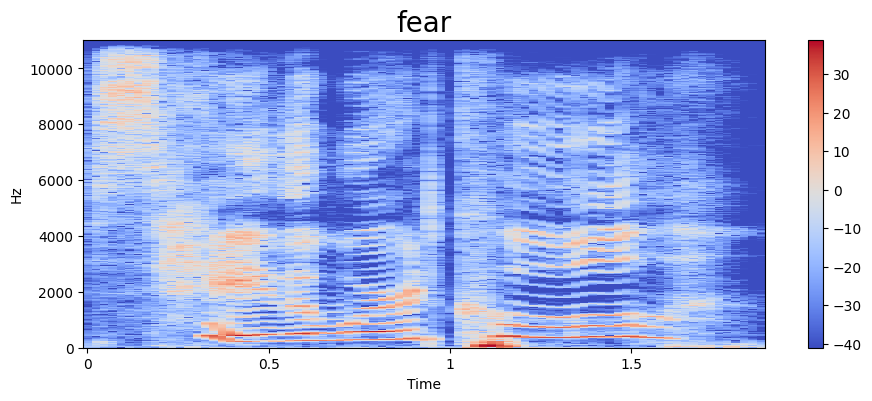

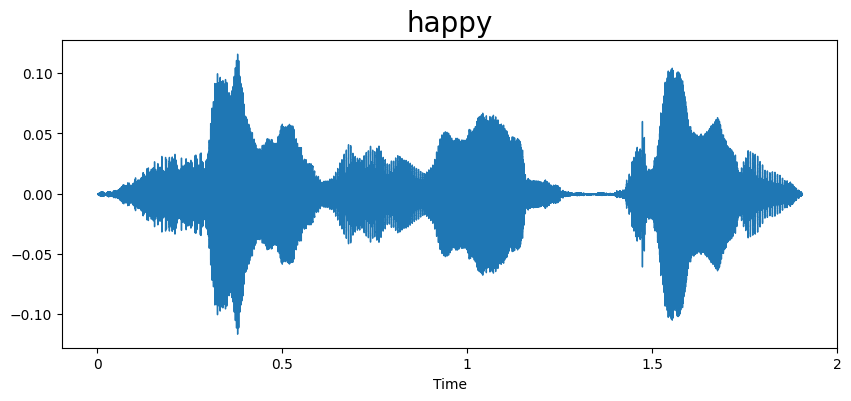

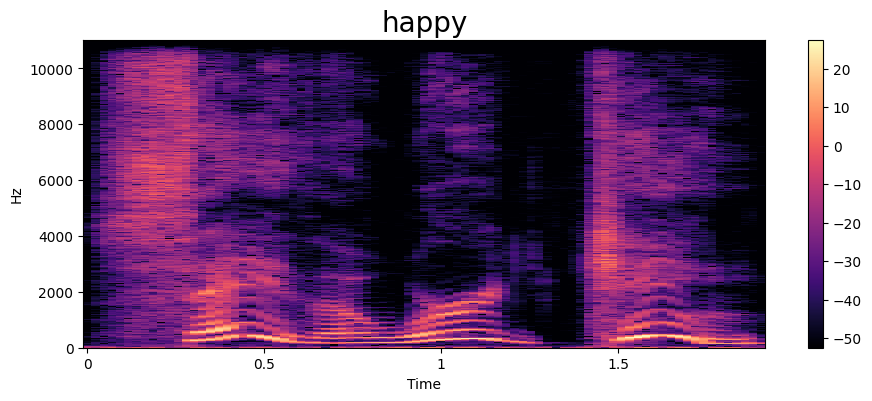

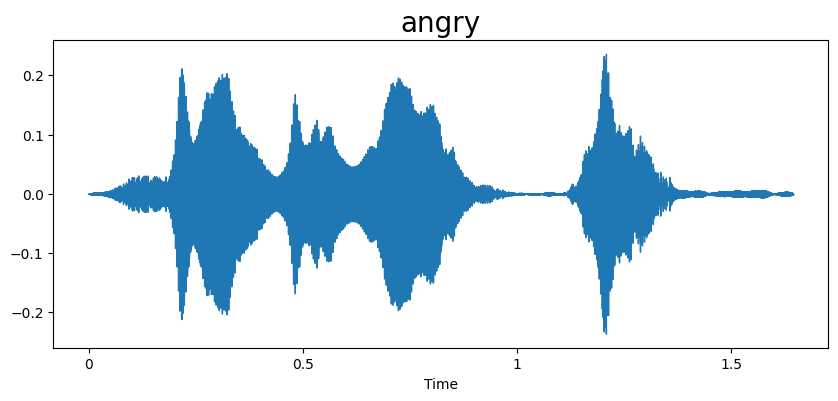

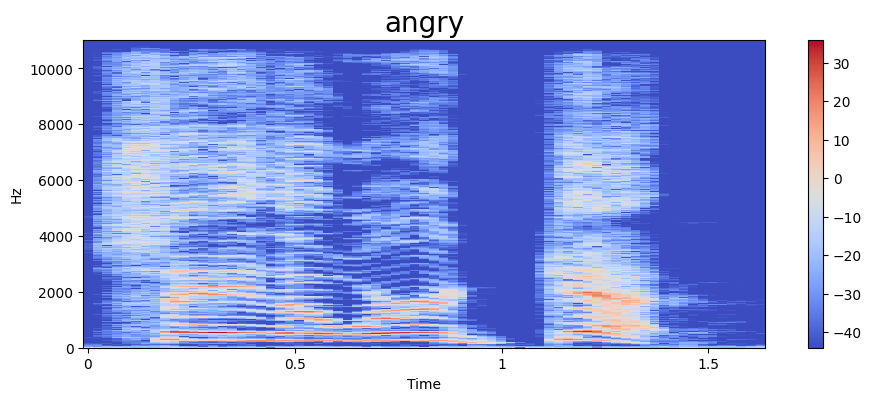

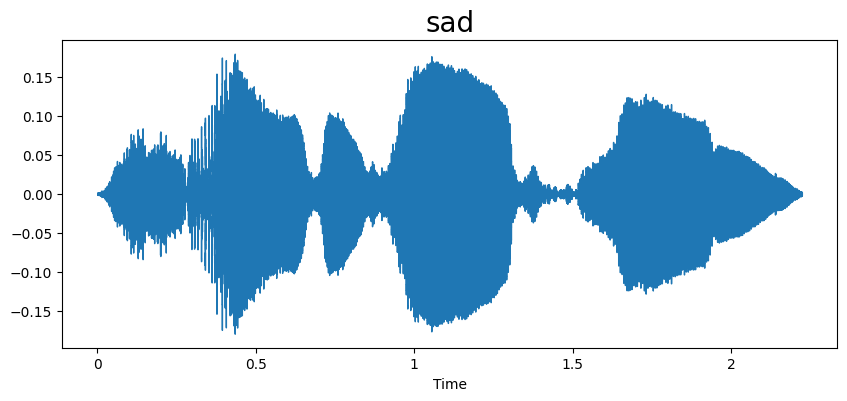

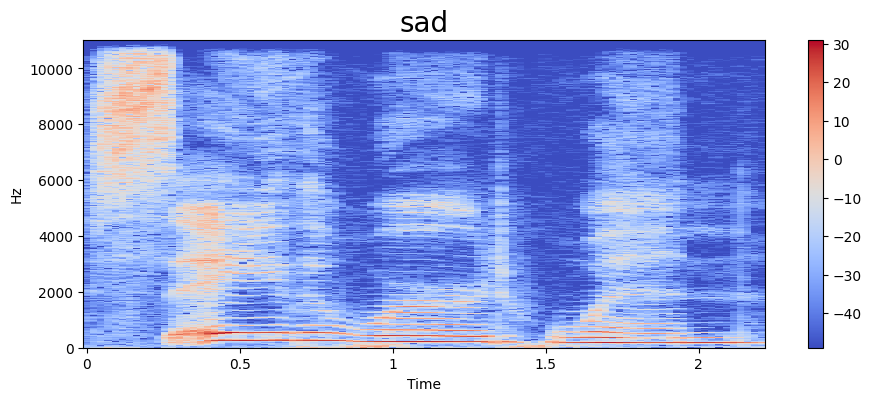

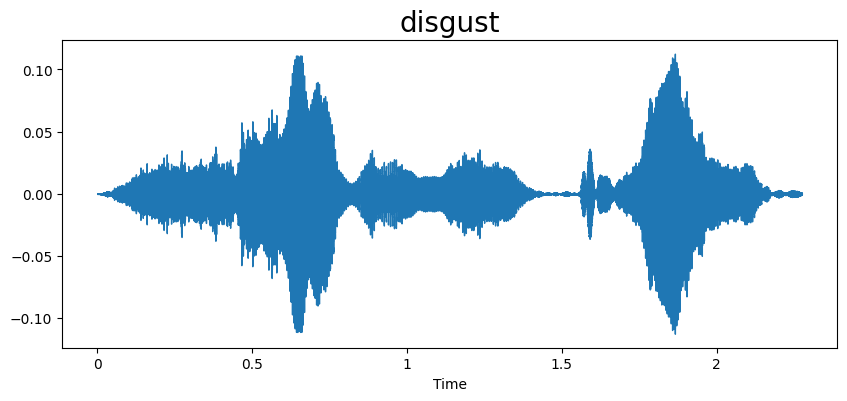

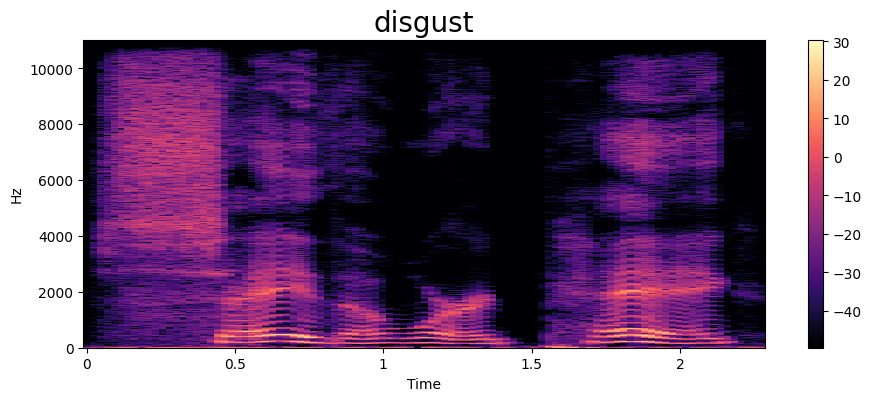

In [20]:
for emotion in df['label'].unique():
        path = np.array(df['speech'][df['label'] == emotion])[0]
        data, sampling_rate = librosa.load(path)
        waveplot(data, sampling_rate, emotion)
        spectogram(data, sampling_rate, emotion)
        display(Audio(path))

<h3>Feature Extraction

In [21]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [22]:
extract_mfcc(df['speech'][0])

array([-4.73864502e+02,  1.37513870e+02,  5.97630787e+00, -1.77859535e+01,
       -1.34801359e+01,  5.30080271e+00, -1.55343838e+01, -6.15539646e+00,
       -2.02777615e+01, -6.50260067e+00, -1.14483709e+01, -1.17779846e+01,
       -4.98322821e+00, -2.90809226e+00, -3.56024575e+00, -7.38868043e-02,
       -2.13799119e+00,  1.07879410e+01,  3.24118757e+00, -4.60338068e+00,
        9.41468239e-01, -3.46500778e+00, -3.99130774e+00,  1.46914399e+00,
       -4.90675640e+00,  1.45201719e+00, -2.97507906e+00, -9.98595297e-01,
       -2.93743610e-01,  2.47226930e+00,  5.03585434e+00,  1.30779085e+01,
        1.54263229e+01,  1.36437283e+01,  2.03859615e+01,  1.26262159e+01,
        1.52439051e+01,  1.65803127e+01,  1.24531078e+01,  8.62664318e+00],
      dtype=float32)

In [23]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [24]:
X_mfcc

0       [-473.8645, 137.51387, 5.976308, -17.785954, -...
1       [-439.22333, 94.551346, 9.278188, -2.6869347, ...
2       [-501.06018, 120.6369, 24.034832, -0.86653507,...
3       [-496.56116, 117.238655, 21.471123, 1.8774668,...
4       [-449.5274, 94.146194, 11.507943, -2.2808812, ...
                              ...                        
2795    [-433.39243, 125.68355, 2.0645583, 17.298477, ...
2796    [-389.76068, 76.22578, -12.164105, 16.117525, ...
2797    [-401.20413, 65.523476, 6.208229, 38.822365, -...
2798    [-446.61188, 87.034485, 13.292481, 42.337887, ...
2799    [-375.8827, 97.74601, -24.463825, 9.774008, -1...
Name: speech, Length: 2800, dtype: object

In [25]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [26]:
## input split
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [28]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [29]:
y = y.toarray()

In [30]:
y.shape

(2800, 7)

<h3>Create the LSTM Model

In [31]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 4

In [32]:
# Train the model
compile = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
35/35 [==============================] - 13s 275ms/step - loss: 1.0482 - accuracy: 0.6129 - val_loss: 4.8845 - val_accuracy: 0.0000e+00
Epoch 2/50
35/35 [==============================] - 8s 233ms/step - loss: 0.3810 - accuracy: 0.8732 - val_loss: 4.6931 - val_accuracy: 0.0000e+00
Epoch 3/50
35/35 [==============================] - 17s 498ms/step - loss: 0.2219 - accuracy: 0.9353 - val_loss: 4.3508 - val_accuracy: 0.0018
Epoch 4/50
35/35 [==============================] - 13s 355ms/step - loss: 0.1844 - accuracy: 0.9482 - val_loss: 4.1528 - val_accuracy: 0.0286
Epoch 5/50
35/35 [==============================] - 7s 207ms/step - loss: 0.1436 - accuracy: 0.9594 - val_loss: 4.4048 - val_accuracy: 0.1857
Epoch 6/50
35/35 [==============================] - 10s 272ms/step - loss: 0.1220 - accuracy: 0.9607 - val_loss: 3.4898 - val_accuracy: 0.3036
Epoch 7/50
35/35 [==============================] - 7s 201ms/step - loss: 0.1158 - accuracy: 0.9665 - val_loss: 4.2842 - val_accuracy: 0

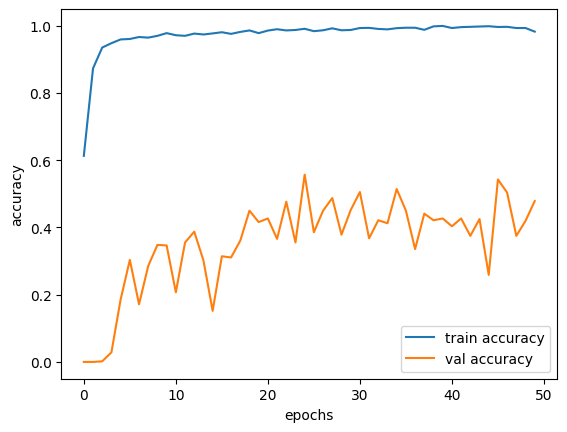

In [37]:
epochs = list(range(50))
acc = compile.history['accuracy']
val_acc = compile.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

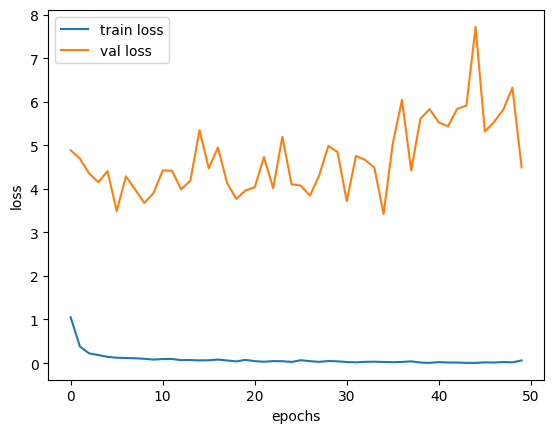

In [38]:
loss = compile.history['loss']
val_loss = compile.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()